# Career Success

Here we preprocess data and train a neural network for predicting starting salaray of individuals aged 18-30 given data about their education and experience. This model is then saved and used in a REST API for a possible frontend or other service to draw from.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. Data Preprocessing

In [2]:
df_cs = pd.read_csv('data/education_career_success.csv')
df_cs.dropna(inplace=True)
df_cs

,Student_ID,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Work_Life_Balance,Entrepreneurship
0,S00001,24,Male,3.58,1052,291,3.96,Arts,3,7,2,9,8,5,27200.0,4,5,Entry,7,No
1,S00002,21,Other,2.52,1211,112,3.63,Law,4,7,3,8,1,4,25000.0,1,1,Mid,7,No
2,S00003,28,Female,3.42,1193,715,2.63,Medicine,4,8,1,1,9,0,42400.0,9,3,Entry,7,No
3,S00004,25,Male,2.43,1497,170,2.81,Computer Science,3,9,1,10,6,1,57400.0,7,5,Mid,5,No
4,S00005,22,Male,2.08,1012,599,2.48,Engineering,4,6,4,10,9,4,47600.0,9,5,Entry,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,S04996,26,Female,2.44,1258,776,2.44,Arts,3,7,3,8,5,5,31500.0,9,5,Mid,7,No
4996,S04997,18,Female,3.94,1032,923,3.73,Law,0,9,3,6,4,5,41800.0,9,2,Entry,4,No
4997,S04998,19,Female,3.45,1299,720,2.52,Law,3,5,5,6,2,2,49500.0,2,5,Mid,6,No
4998,S04999,19,Male,2.70,1038,319,3.94,Law,1,4,5,5,1,5,54700.0,9,4,Entry,6,No


We select only features relating to educational history and experience as the focus is to only predict salaray for this exercise.

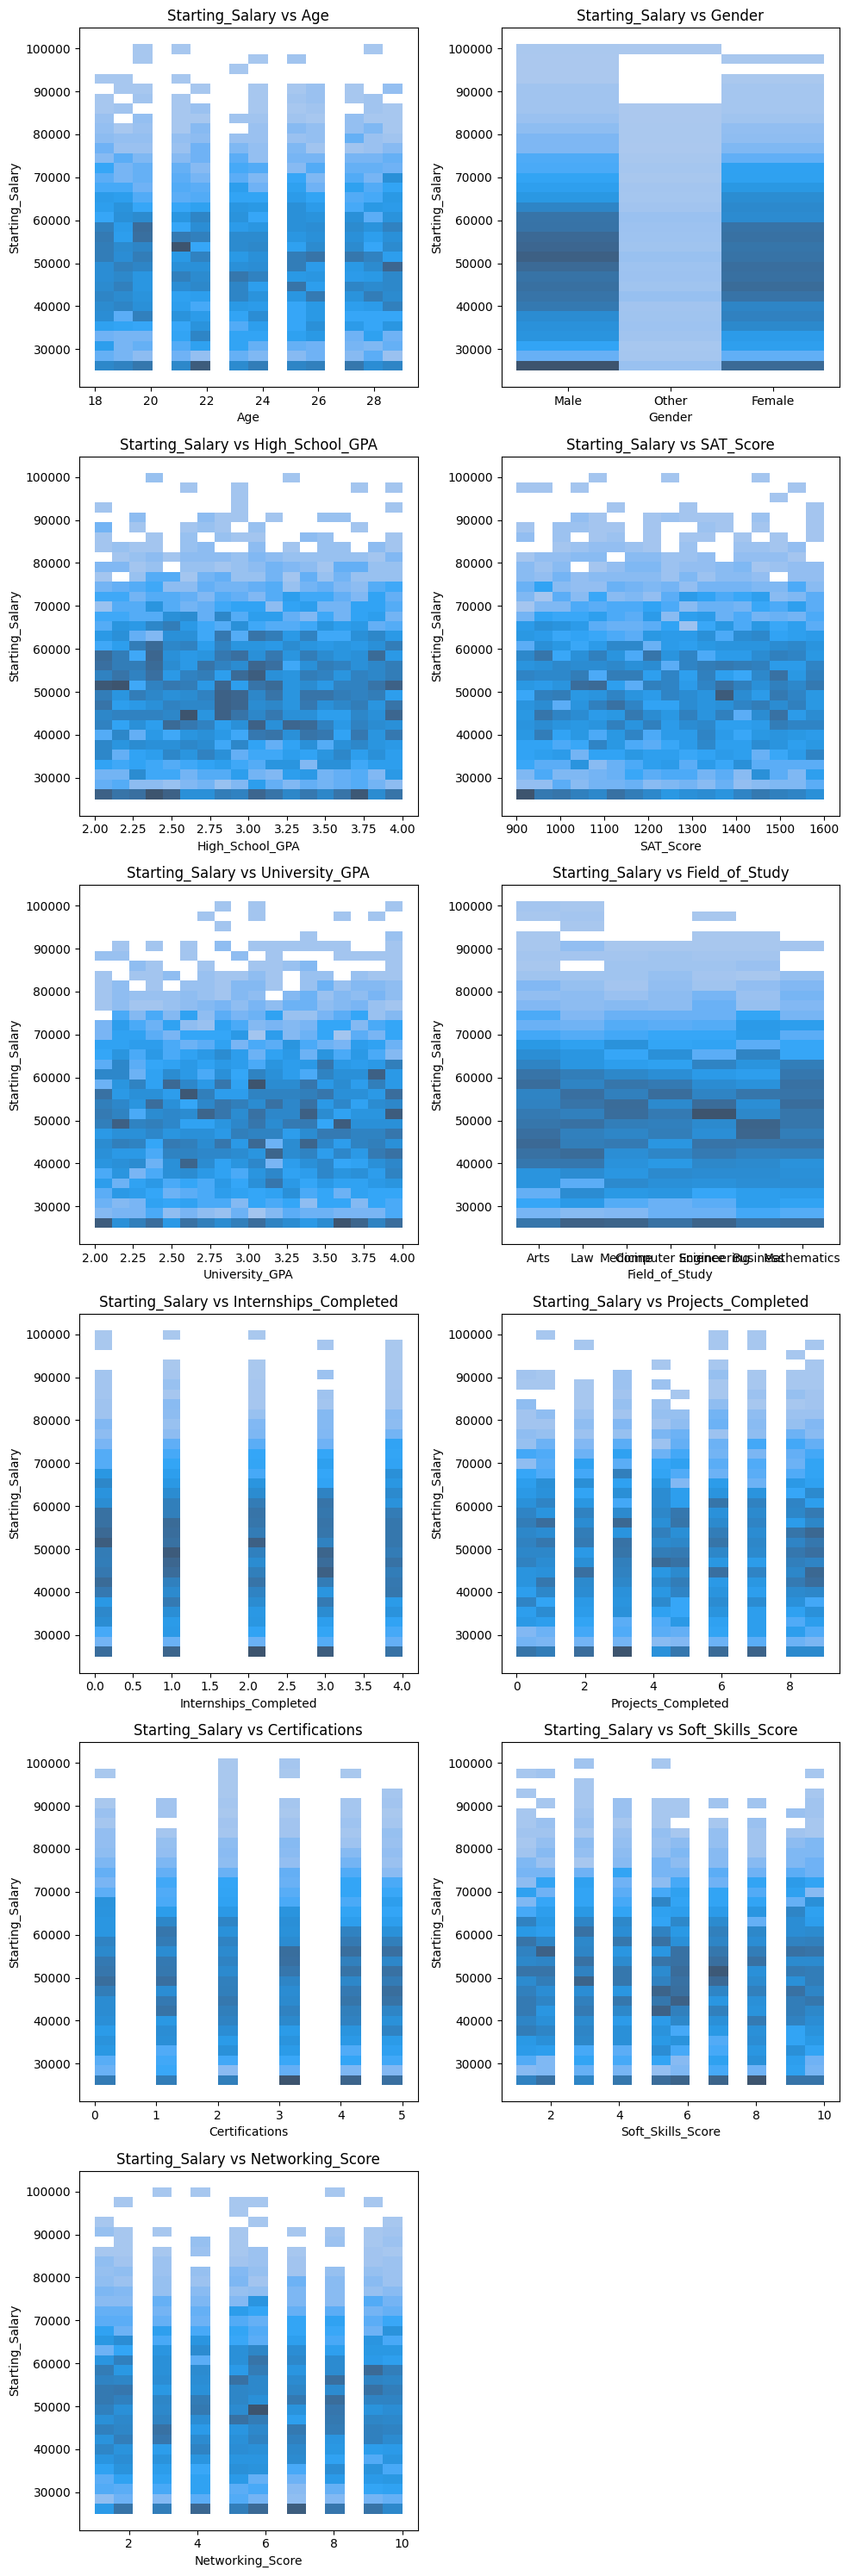

In [3]:
# Select features that will be used for the model
df_model = df_cs[['Age', 'Gender', 'High_School_GPA', 'SAT_Score', 'University_GPA', 'Field_of_Study', 'Internships_Completed', 'Projects_Completed', 'Certifications', 'Soft_Skills_Score', 'Networking_Score', 'Starting_Salary']]

# Feature to compare against all others
target_feature = 'Starting_Salary'

# Get the list of features to compare (excluding the target)
features = [col for col in df_model.columns if col != target_feature]

# Define grid size (rows, cols)
num_features = len(features)
rows = (num_features + 1) // 2  # Adjust for even/odd number of plots
cols = 2  # Number of columns

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(10, 5 * rows))  # Adjust size
axes = axes.flatten()  # Flatten to 1D array for easy indexing

# Plot each feature against the target
for i, feature in enumerate(features):
    sns.histplot(x=df_model[feature], y=df_model[target_feature], ax=axes[i])
    axes[i].set_title(f"{target_feature} vs {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel(target_feature)

# Hide empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

The darkest areas across all plots appear between the starting salary of 50000-60000. 

In [4]:
# Encode categorical variables
df_model = pd.get_dummies(df_model, columns=['Gender', 'Field_of_Study'], dtype='int')
df_model

,Age,High_School_GPA,SAT_Score,University_GPA,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Starting_Salary,Gender_Female,Gender_Male,Gender_Other,Field_of_Study_Arts,Field_of_Study_Business,Field_of_Study_Computer Science,Field_of_Study_Engineering,Field_of_Study_Law,Field_of_Study_Mathematics,Field_of_Study_Medicine
0,24,3.58,1052,3.96,3,7,2,9,8,27200.0,0,1,0,1,0,0,0,0,0,0
1,21,2.52,1211,3.63,4,7,3,8,1,25000.0,0,0,1,0,0,0,0,1,0,0
2,28,3.42,1193,2.63,4,8,1,1,9,42400.0,1,0,0,0,0,0,0,0,0,1
3,25,2.43,1497,2.81,3,9,1,10,6,57400.0,0,1,0,0,0,1,0,0,0,0
4,22,2.08,1012,2.48,4,6,4,10,9,47600.0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,26,2.44,1258,2.44,3,7,3,8,5,31500.0,1,0,0,1,0,0,0,0,0,0
4996,18,3.94,1032,3.73,0,9,3,6,4,41800.0,1,0,0,0,0,0,0,1,0,0
4997,19,3.45,1299,2.52,3,5,5,6,2,49500.0,1,0,0,0,0,0,0,1,0,0
4998,19,2.70,1038,3.94,1,4,5,5,1,54700.0,0,1,0,0,0,0,0,1,0,0


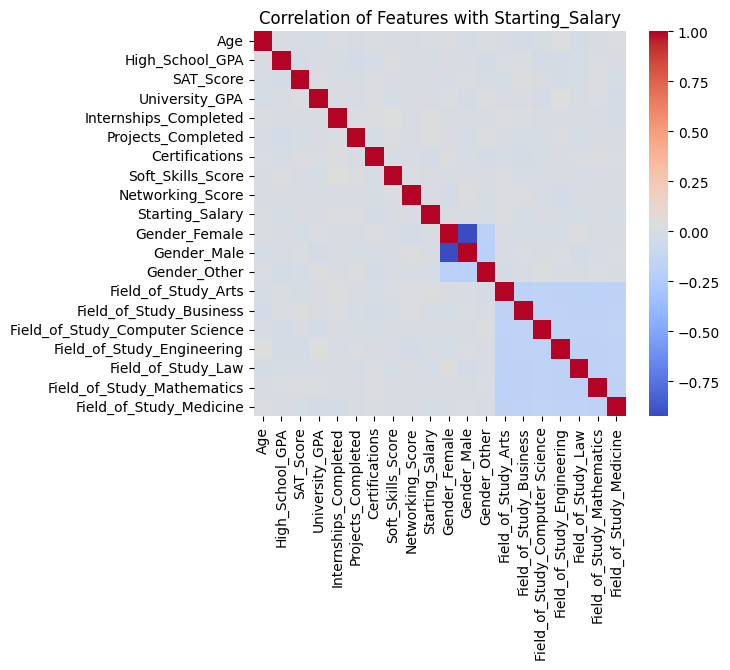

In [5]:
plt.figure(figsize=(6, 5))
sns.heatmap(df_model.corr(), cmap='coolwarm', fmt=".2f")
plt.title(f"Correlation of Features with {target_feature}")
plt.show()

The plot shows that there is basically no correlation between model features other than for gender and field of study.

In [6]:
# Scale features to train the neural network
df_model[['High_School_GPA','University_GPA']] = (df_model[['High_School_GPA','University_GPA']] - 0)/ (4 - 0)
df_model[['SAT_Score']] = (df_model[['SAT_Score']] - 400)/ (1600 - 400)
df_model[['Soft_Skills_Score', 'Networking_Score']] = (df_model[['Soft_Skills_Score', 'Networking_Score']] - 0)/ (10 - 0)
df_model[['Age']] = (df_model[['Age']] - 18)/ (30 - 18)

# Store normalisation parameters for manual testing
means = df_model[['Internships_Completed', 'Projects_Completed', 'Certifications']].mean()
stds = df_model[['Internships_Completed', 'Projects_Completed', 'Certifications']].std()
df_model[['Internships_Completed', 'Projects_Completed', 'Certifications']] = (df_model[['Internships_Completed', 'Projects_Completed', 'Certifications']] - means)/stds
df_model


,Age,High_School_GPA,SAT_Score,University_GPA,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Starting_Salary,Gender_Female,Gender_Male,Gender_Other,Field_of_Study_Arts,Field_of_Study_Business,Field_of_Study_Computer Science,Field_of_Study_Engineering,Field_of_Study_Law,Field_of_Study_Mathematics,Field_of_Study_Medicine
0,0.500000,0.8950,0.543333,0.9900,0.722757,0.848334,-0.300731,0.9,0.8,27200.0,0,1,0,1,0,0,0,0,0,0
1,0.250000,0.6300,0.675833,0.9075,1.432874,0.848334,0.286405,0.8,0.1,25000.0,0,0,1,0,0,0,0,1,0,0
2,0.833333,0.8550,0.660833,0.6575,1.432874,1.196411,-0.887867,0.1,0.9,42400.0,1,0,0,0,0,0,0,0,0,1
3,0.583333,0.6075,0.914167,0.7025,0.722757,1.544488,-0.887867,1.0,0.6,57400.0,0,1,0,0,0,1,0,0,0,0
4,0.333333,0.5200,0.510000,0.6200,1.432874,0.500256,0.873541,1.0,0.9,47600.0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.666667,0.6100,0.715000,0.6100,0.722757,0.848334,0.286405,0.8,0.5,31500.0,1,0,0,1,0,0,0,0,0,0
4996,0.000000,0.9850,0.526667,0.9325,-1.407594,1.544488,0.286405,0.6,0.4,41800.0,1,0,0,0,0,0,0,1,0,0
4997,0.083333,0.8625,0.749167,0.6300,0.722757,0.152179,1.460677,0.6,0.2,49500.0,1,0,0,0,0,0,0,1,0,0
4998,0.083333,0.6750,0.531667,0.9850,-0.697477,-0.195898,1.460677,0.5,0.1,54700.0,0,1,0,0,0,0,0,1,0,0


In [7]:
print(means)

Internships_Completed    1.9822
Projects_Completed       4.5628
Certifications           2.5122
dtype: float64


In [8]:
print(stds)

Internships_Completed    1.408219
Projects_Completed       2.872927
Certifications           1.703183
dtype: float64


#### 2. Model Training

In [9]:
from sklearn.model_selection import train_test_split

y = df_model['Starting_Salary']
X = df_model.drop(['Starting_Salary'], axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

Epoch 1/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 50704.0859 - val_loss: 50549.1836
Epoch 2/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 50525.4805 - val_loss: 50530.2891
Epoch 3/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 50542.4180 - val_loss: 50466.0391
Epoch 4/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 50320.4180 - val_loss: 50285.5586
Epoch 5/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 50650.9180 - val_loss: 49856.0195
Epoch 6/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 49979.6133 - val_loss: 48968.2734
Epoch 7/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 48641.9531 - val_loss: 47324.3047
Epoch 8/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 46688.7812 - val_loss: 44530.4180
Epoch 9/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 43449.8164 - val_loss: 40085.3750
Epoch 10/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 38742.1289 - val_loss: 33372.3555
Epoch 11/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 31549

<Axes: title={'center': 'MSE'}, xlabel='Epoch', ylabel='MSE'>

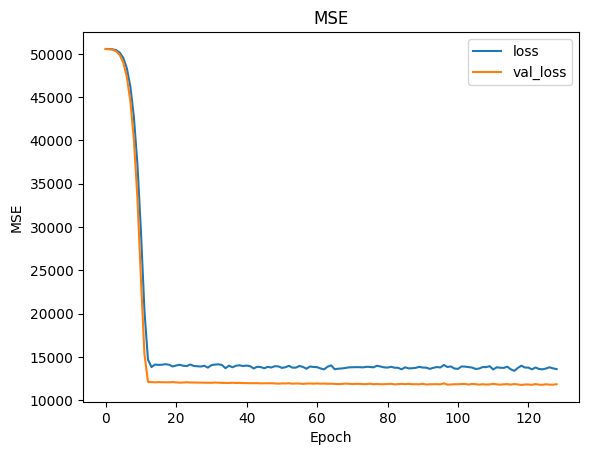

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

# Define the neural network
nn_model = keras.Sequential([
    layers.Dense(units=256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(units=128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(units=32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(units=1)
])

# Select the training optimizer and loss function
nn_model.compile(
    optimizer='adam',
    loss='mae',
)

# Define callback to prevent unecessary training loop
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.1,
    restore_best_weights=True,
)

# Train the model
history = nn_model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=150,
    callbacks=[early_stopping],
)

# Plot training loss
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="MSE", xlabel='Epoch', ylabel='MSE')
# history_df.loc[:, ['mean_squared_error', 'val_mean_squared_error']].plot(title="MSE", xlabel='Epoch', ylabel='MSE')

In [11]:
# Save the model
nn_model.save('../app/model_data/career_success_model.keras')

In [12]:
nn_model.predict(X_valid.iloc[100].to_numpy().reshape(1, -1))[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


array([51097.453], dtype=float32)